<a href="https://colab.research.google.com/github/nazmus007/transformers_test/blob/main/semeval_bert_run1_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq transformers

     |████████████████████████████████| 2.9 MB 8.4 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 895 kB 80.8 MB/s 
     |████████████████████████████████| 3.3 MB 77.4 MB/s 
     |████████████████████████████████| 636 kB 83.3 MB/s 


In [ ]:
print(transformers.__version__)

4.10.0


In [52]:
exit()

In [2]:
!pip install emoji

     |████████████████████████████████| 168 kB 7.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.0-py3-none-any.whl size=168256 sha256=c03072add7af885432b751b9bef2dbbe29ea774f41a98204b8a093ee8f57e493
  Stored in directory: /root/.cache/pip/wheels/f7/d7/74/c720aaf345a042b0c2d74361873258c5e8649b7f11b2ccce49
Successfully built emoji


In [ ]:
torch.cuda.empty_cache()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Mon Sep  6 09:14:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import transformers

from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup, BertForSequenceClassification

import torch
import re
import numpy as np
import pandas as pd

import seaborn as sns

from pylab import rcParams

import matplotlib.pyplot as plt

from matplotlib import rc

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

from collections import defaultdict

from textwrap import wrap

from torch import nn, optim

from torch.utils.data import Dataset, DataLoader

In [2]:
import torch.nn.functional as F

In [3]:
df = pd.read_csv("./drive/MyDrive/datasets/cleaned_semeval_wnotebook_5.csv")
df.head()

,Tweet index,Label,Tweet
0,1,1,sweet united nations video just in time for ch...
1,2,1,we are rumored to have talked to erv is agent ...
2,3,1,hey there nice to see you minnesotand winter w...
3,4,0,3 episodes left i am dying over here
4,5,1,i cannot breathe was chosen as the most notabl...


In [4]:
df = df.drop(['Tweet index'],axis=1)

In [5]:
df.dropna(subset = ["Tweet"], inplace=True)

In [8]:
!pip install demoji

     |████████████████████████████████| 42 kB 709 kB/s 


In [9]:
import demoji
def demoji_text(text):
  d= demoji.findall(text)
  return d

In [10]:
df['emoji_list'] = df['Tweet'].apply(demoji_text)

In [11]:
f= list(filter(None, df['emoji_list']))

In [12]:
print(f)

[{'😡': 'pouting face'}, {'😬': 'grimacing face'}, {'❤️': 'red heart'}, {'😅': 'grinning face with sweat'}, {'😁': 'beaming face with smiling eyes'}, {'😐': 'neutral face'}, {'😱': 'face screaming in fear'}, {'👭': 'women holding hands', '☺': 'smiling face'}, {'💯': 'hundred points', '😳': 'flushed face'}, {'😴': 'sleeping face'}, {'💩': 'pile of poo'}, {'😩': 'weary face'}, {'😑': 'expressionless face'}, {'🎶': 'musical notes'}, {'😃': 'grinning face with big eyes', '😇': 'smiling face with halo'}, {'😂': 'face with tears of joy'}, {'🙌': 'raising hands'}, {'😲': 'astonished face', '😂': 'face with tears of joy'}, {'✈️': 'airplane', '❤️': 'red heart', '🌏': 'globe showing Asia-Australia'}, {'😘': 'face blowing a kiss', '😍': 'smiling face with heart-eyes'}, {'😘': 'face blowing a kiss', '😳': 'flushed face', '😍': 'smiling face with heart-eyes'}, {'☀️': 'sun', '🎶': 'musical notes'}, {'🙊': 'speak-no-evil monkey'}, {'😭': 'loudly crying face'}, {'😩': 'weary face'}, {'🌴': 'palm tree', '☀': 'sun'}, {'🔫': 'water pis

In [13]:
any(f)

True

In [14]:
all_keys = set().union(*(d.keys() for d in f))

In [15]:
print(all_keys)

{'👳', '🚑', '⛄', '❄', '🚒', '🆘', '😱', '😛', '❌', '👯', '💧', '💃', '😁', '🐁', '🍵', '😃', '😬', '❤', '🙏', '😠', '😂', '👎', '😰', '✈️', '😊', '😏', '👌', '🚀', '🎵', '💤', '👍', '👊', '💜', '🔥', '😅', '🎧', '😜', '🎁', '🎼', '🍴', '📚', '🙈', '🏃', '🔌', '😀', '💻', '😎', '🍸', '🙋', '✌️', '💾', '😖', '🔪', '🏆', '🌏', '✋', '💁', '😫', '😋', '👈', '🍆', '☀', '☁', '☺️', '🐱', '💅', '⚾', '🎤', '♥', '🌴', '🐶', '🙌', '💕', '😘', '🍹', '💩', '💣', '😐', '🙆', '🍻', '😷', '🏀', '😑', '🍟', '💰', '🐸', '💘', '😟', '😳', '💋', '🚓', '😪', '😒', '💯', '😍', '😩', '💗', '☹', '⭕', '😲', '🐣', '🚍', '👏', '🎻', '😭', '💪', '😻', '💀', '🍷', '🛀', '❄️', '📖', '👸', '☀️', '🙊', '😄', '🔫', '😇', '🙀', '🎄', '😶', '💓', '✨', '⚡', '➡️', '🙅', '😕', '💨', '😤', '😔', '👐', '☕', '😞', '😵', '😣', '🇫🇴', '💦', '😡', '✅', '🇬🇧', '🙇', '👑', '☔', '😢', '🎶', '💔', '💚', '😆', '😝', '🚶', '💖', '🎉', '💭', '👤', '🎅', '❤️', '😉', '🍕', '👉', '☺', '😴', '👭', '🔜', '📷'}


In [ ]:
emoji_1 = re.compile('[\\u203C-\\u3299\\U0001F000-\\U0001F644]')

In [ ]:
emoji_list= list(filter(emoji_1.match, df['Tweet']))

In [ ]:
print(emoji_list)

['🍃oh this will surely help the admissions office with their recruitment of students of color    ', '😏 i enjoy our random conversations at the bcm and i thank you for introducing me to one direction  godawgs', '😙love kpop i love kpop dude  pestimistic evil beautiful coldandcalculating lanadelrey artpop f4f shoutout', '💎👑💎👑💎👑1k tweet goes to  because shes kallie and she shes sassy and gets what she wants when she wants it 👑💎👑💎👑💎  😘', '😱 rt  rt  yeah gsp definitely won that fight  ', '😂 rt   my uncle used to refer to missed calls as miskeen calls  laugh out loud', '😂 “ awwwwwww saigon got some drake in him how adorable   lhhny”', '😕 looks like i am not goin to sleep shower there ', '★ all my best wishes andamp happy new y34r 2014 keep partying andamp rave on  2013 was greatfull of goodiesand ', '☕️good morning from germany         🍩', '💊 a study in pink 🎎 the blind banker 💣 the great game  📱 a scandal in belgravia 🐾 the hounds of baskerville 🏥 the reichenbach fall', '♡ me myself someonee

In [ ]:
emo_found= ' '.join(emoji for emoji in emoji_list)

In [6]:
from emoji import UNICODE_EMOJI

def get_emoji_set(text):
    return {letter for letter in text if letter in UNICODE_EMOJI['en'] }

In [ ]:
c = get_emoji_set(emo_found)

In [ ]:
print(c)

{'😕', '😳', '❤', '🎁', '😢', '🎈', '📱', '🐶', '💎', '🎶', '😂', '🌞', '🎧', '🍩', '😩', '🐒', '🍀', '😍', '🌏', '😊', '💗', '🍻', '😋', '🎀', '😇', '🏈', '🙊', '☺', '⭐', '😱', '😏', '👼', '🌍', '💦', '👫', '🎅', '🍊', '👑', '🙈', '💊', '💣', '🐾', '🎎', '😆', '👌', '😙', '💯', '🎄', '🏥', '▶', '🐉', '😛', '💚', '😔', '😒', '❄', '☹', '♥', '✨', '🙉', '💕', '🐸', '💝', '😝', '⛄', '☕', '🍃', '😘'}


In [ ]:
df.head()

,Tweet,Label
0,peyton obviously cannot finish games he just t...,1
1,well i would love to be sleeping right now but...,1
2,my biggest executive decision today choosing b...,1
3,the first quality opponent they played in 2 y...,1
4,but do not you dare call it hate crimes libe...,1


In [17]:
!pip install emoji

     |████████████████████████████████| 185 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-1.5.0-py3-none-any.whl size=187457 sha256=10e21c28e7cb748fa9d5bfa6b2cb229532ca7be45c698195f08b607de61ddb65
  Stored in directory: /root/.cache/pip/wheels/db/b5/f6/b39abf14e94b3d6640613bbe630a66c10ccf7a12882d064fb5
Successfully built emoji


In [6]:
import emoji
def extract_emojis(s):
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

In [7]:
df['Tweet'] = df['Tweet'].apply(extract_emojis)

In [8]:
df.columns = df.columns.str.lstrip()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


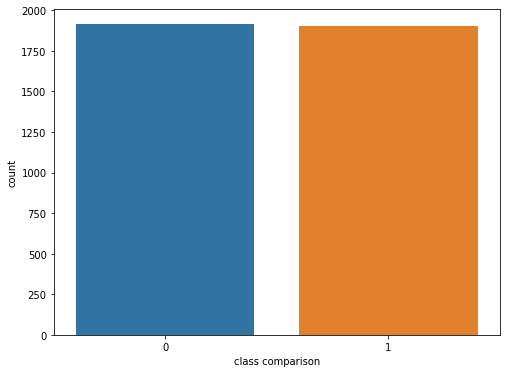

In [9]:
rcParams['figure.figsize'] = 8, 6
sns.countplot(df.Label)
plt.xlabel('class comparison');

In [ ]:
exit()

In [10]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

In [11]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
tokenizer.add_tokens(['👳', '🚑', '⛄', '❄', '🚒', '🆘', '😱', '😛', '❌', '👯', '💧', '💃', '😁', '🐁', '🍵', '😃', '😬', '❤', '🙏', '😠', '😂', '👎', '😰', '✈️', '😊', '😏', '👌', '🚀', '🎵', '💤', '👍', '👊', '💜', '🔥', '😅', '🎧', '😜', '🎁', '🎼', '🍴', '📚', '🙈', '🏃', '🔌', '😀', '💻', '😎', '🍸', '🙋', '✌️', '💾', '😖', '🔪', '🏆', '🌏', '✋', '💁', '😫', '😋', '👈', '🍆', '☀', '☁', '☺️', '🐱', '💅', '⚾', '🎤', '♥', '🌴', '🐶', '🙌', '💕', '😘', '🍹', '💩', '💣', '😐', '🙆', '🍻', '😷', '🏀', '😑', '🍟', '💰', '🐸', '💘', '😟', '😳', '💋', '🚓', '😪', '😒', '💯', '😍', '😩', '💗', '☹', '⭕', '😲', '🐣', '🚍', '👏', '🎻', '😭', '💪', '😻', '💀', '🍷', '🛀', '❄️', '📖', '👸', '☀️', '🙊', '😄', '🔫', '😇', '🙀', '🎄', '😶', '💓', '✨', '⚡', '➡️', '🙅', '😕', '💨', '😤', '😔', '👐', '☕', '😞', '😵', '😣', '🇫🇴', '💦', '😡', '✅', '🇬🇧', '🙇', '👑', '☔', '😢', '🎶', '💔', '💚', '😆', '😝', '🚶', '💖', '🎉', '💭', '👤', '🎅', '❤️', '😉', '🍕', '👉', '☺', '😴', '👭', '🔜', '📷'])



163

In [12]:
sample_txt = 'didnt have no time to wake and bake this mornin  winnin 😡 🙅'

In [27]:
exit()

In [13]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: didnt have no time to wake and bake this mornin  winnin 😡 🙅
   Tokens: ['didn', '##t', 'have', 'no', 'time', 'to', 'wake', 'and', 'ba', '##ke', 'this', 'mor', '##nin', 'win', '##nin', '😡', '🙅']
Token IDs: [2134, 2102, 2031, 2053, 2051, 2000, 5256, 1998, 8670, 3489, 2023, 22822, 11483, 2663, 11483, 30658, 30646]


In [14]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


dict_keys(['input_ids', 'attention_mask'])

In [15]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([  101,  2134,  2102,  2031,  2053,  2051,  2000,  5256,  1998,  8670,
         3489,  2023, 22822, 11483,  2663, 11483, 30658, 30646,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

In [16]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [17]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'didn',
 '##t',
 'have',
 'no',
 'time',
 'to',
 'wake',
 'and',
 'ba',
 '##ke',
 'this',
 'mor',
 '##nin',
 'win',
 '##nin',
 '😡',
 '🙅',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [18]:
token_lens = []

for txt in df.Tweet:
  tokens = tokenizer.encode(txt, max_length=256)
  token_lens.append(len(tokens))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


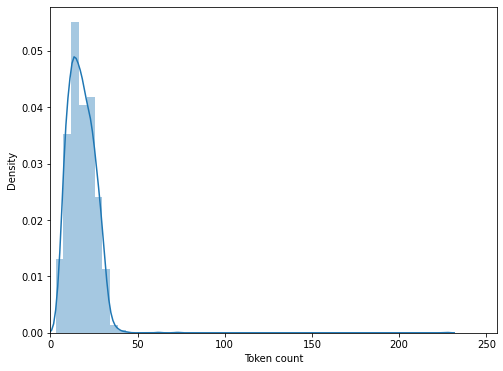

In [19]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [20]:
MAX_LEN = 128

In [21]:
class SarcasmDataset(Dataset):

  def __init__(self, tweets, targets, tokenizer, max_len):
    self.tweets = tweets
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.tweets)
  
  def __getitem__(self, item):
    tweet = str(self.tweets[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      tweet,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'tweet_text': tweet,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [22]:
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [23]:
print(device)

cuda:0


In [24]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.3, random_state=RANDOM_SEED)

In [25]:
df_train.shape, df_val.shape, df_test.shape

((3052, 2), (534, 2), (230, 2))

In [26]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = SarcasmDataset(
    tweets=df.Tweet.to_numpy(),
    targets=df.Label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [27]:
BATCH_SIZE = 64

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [28]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

dict_keys(['tweet_text', 'input_ids', 'attention_mask', 'targets'])

In [29]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([64, 128])
torch.Size([64, 128])
torch.Size([64])


In [30]:
bert_model_1 = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model_1.resize_token_embeddings(len(tokenizer))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Embedding(30685, 768)

In [31]:
last_hidden_state, pooled_output = bert_model_1(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask'],
  return_dict = False
)

In [32]:
last_hidden_state.shape

torch.Size([1, 32, 768])

In [33]:
bert_model_1.config.hidden_size

768

In [34]:
pooled_output.shape

torch.Size([1, 768])

In [35]:
class SarcasmClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SarcasmClassifier, self).__init__()
    self.bert = bert_model_1
    self.drop = nn.Dropout(p=0.4)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    returned = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    pooled_output = returned["pooler_output"]
    output = self.drop(pooled_output)
    return self.out(output)

In [36]:
class_names=['1', '0']

In [37]:
len(class_names)

2

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

In [38]:
model = SarcasmClassifier(len(class_names))
model.to(device)

SarcasmClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30685, 768)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
         

In [42]:
model

SarcasmClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30685, 768)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
         

In [39]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([64, 128])
torch.Size([64, 128])


In [40]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.4422, 0.5578],
        [0.4610, 0.5390],
        [0.6079, 0.3921],
        [0.4842, 0.5158],
        [0.6856, 0.3144],
        [0.4569, 0.5431],
        [0.6337, 0.3663],
        [0.5822, 0.4178],
        [0.4577, 0.5423],
        [0.5039, 0.4961],
        [0.4512, 0.5488],
        [0.6756, 0.3244],
        [0.3598, 0.6402],
        [0.6425, 0.3575],
        [0.3712, 0.6288],
        [0.5996, 0.4004],
        [0.5812, 0.4188],
        [0.4177, 0.5823],
        [0.6249, 0.3751],
        [0.3779, 0.6221],
        [0.7830, 0.2170],
        [0.4157, 0.5843],
        [0.6491, 0.3509],
        [0.4270, 0.5730],
        [0.6795, 0.3205],
        [0.5273, 0.4727],
        [0.5275, 0.4725],
        [0.4497, 0.5503],
        [0.5888, 0.4112],
        [0.5701, 0.4299],
        [0.6824, 0.3176],
        [0.5425, 0.4575],
        [0.3674, 0.6326],
        [0.3975, 0.6025],
        [0.3491, 0.6509],
        [0.5114, 0.4886],
        [0.5644, 0.4356],
        [0.5844, 0.4156],
        [0.3

In [41]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.weight']
# Separate the `weight` parameters from the `bias` parameters. 
# - For the `weight` parameters, this specifies a 'weight_decay_rate' of 0.01. 
# - For the `bias` parameters, the 'weight_decay_rate' is 0.0. 
optimizer_grouped_parameters = [
    # Filter for all parameters which *don't* include 'bias', 'gamma', 'beta'.
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.1},
    
    # Filter for parameters which *do* include those.
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [42]:
EPOCHS = 5

optimizer = AdamW(optimizer_grouped_parameters, lr=5e-5, eps= 1e-8)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [43]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [44]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [45]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state_semeval_6.bin')
    best_accuracy = val_acc

Epoch 1/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.6683910600841045 accuracy 0.580602883355177


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 0.6295582718319364 accuracy 0.6404494382022472

Epoch 2/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.5328085925430059 accuracy 0.7250982961992136


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 0.6435328655772738 accuracy 0.6779026217228464

Epoch 3/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.34663534195472795 accuracy 0.8532110091743119


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 0.7984039121203952 accuracy 0.6685393258426966

Epoch 4/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.17780285398475826 accuracy 0.9374180865006553


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 1.1321216622988384 accuracy 0.6591760299625469

Epoch 5/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.11581899334366123 accuracy 0.9616644823066841


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 0.9765186905860901 accuracy 0.6853932584269663

CPU times: user 3min 3s, sys: 3.45 s, total: 3min 7s
Wall time: 3min 8s


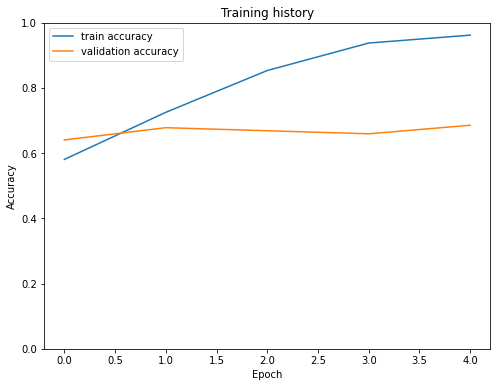

In [46]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()
plt.ylim([0, 1]);

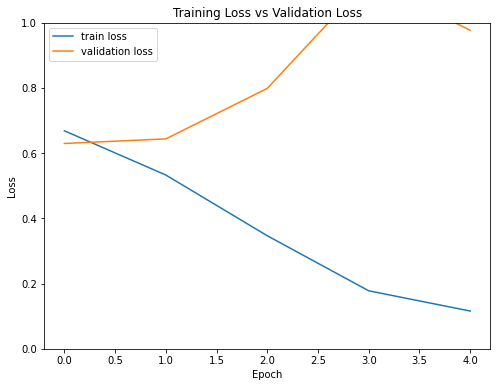

In [47]:
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')

plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [69]:
exit()

In [48]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  tweet_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["tweet_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      tweet_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return tweet_texts, predictions, prediction_probs, real_values

In [49]:
y_tweet_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

In [58]:
print(classification_report(y_test, y_pred,target_names=class_names))

              precision    recall  f1-score   support

           1       0.67      0.69      0.68       118
           0       0.66      0.64      0.65       112

    accuracy                           0.67       230
   macro avg       0.66      0.66      0.66       230
weighted avg       0.67      0.67      0.67       230



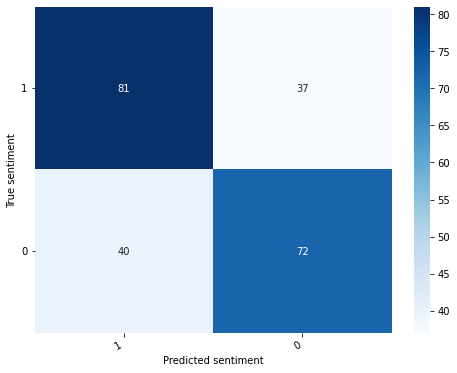

In [59]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [60]:
idx = 2

tweet_text = y_tweet_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [61]:
print("\n".join(wrap(tweet_text)))
print()
print(f'True sentiment: {class_names[true_sentiment]}')

why is paper so sharp someone should put a ban on paper
liberalmentality

True sentiment: 0


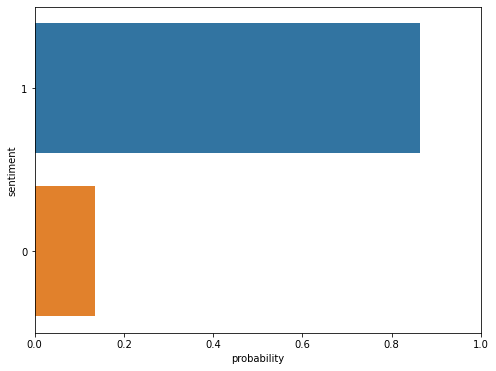

In [62]:
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [63]:
review_text = "so missing the girls basketball game is just great 😭"

In [64]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [65]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Tweet text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Tweet text: so missing the girls basketball game is just great 😭
Sentiment  : 0
